In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
#import mpld3 as mpl

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [7]:
df=pd.read_csv("G:/final year project/Mask ventillation/Mask ventilation data and code/edited_entire_dataset_604120.csv")

In [16]:
df=pd.read_csv("G:/final year project/Mask ventillation/Mask ventilation data and code/df_formated_data_shuffled_604122.csv")

In [17]:
df

,age,gender,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
0,92,male,25.0,0,2,0,3,1,36,0,0,1,1
1,9,male,20.0,0,1,0,1,1,20,0,0,0,0
2,94,male,15.0,0,3,0,2,1,36,0,0,0,1
3,108,male,25.0,0,1,0,1,0,20,0,0,0,1
4,54,male,24.0,0,1,0,1,1,32,1,0,1,1
5,106,male,27.0,1,1,0,1,1,50,1,1,1,2
6,104,male,15.0,0,3,0,1,0,38,0,0,0,1
7,66,male,40.0,1,2,0,1,1,32,0,0,0,1
8,64,male,41.0,0,1,0,3,1,32,0,0,1,1
9,102,male,26.0,1,2,0,2,1,51,1,1,1,2


In [11]:
df['target']=df['target'].map({'difficult':1, 'easy':0, 'impossible':2})

df['beard']=df['beard'].map({'yes':1, 'no':0})

df['neck_radiation']=df['neck_radiation'].map({'yes':1, 'no':0})

df['teeth']=df['teeth'].map({'yes':1, 'no':0})

df['stiff_lungs']=df['stiff_lungs'].map({'yes':1, 'no':0})

df['macroglossia']=df['macroglossia'].map({'yes':1, 'no':0})

df['history_of_snoring']=df['history_of_snoring'].map({'yes':1, 'no':0})

Text(0,0.5,'Frequency')

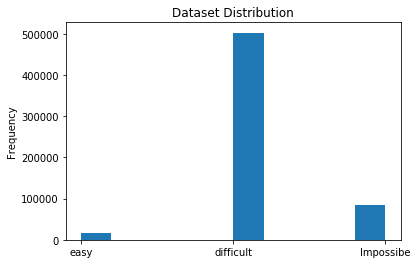

In [12]:
df.describe()
figure=plt.figure()
plt.hist(df['target'])
plt.title('Dataset Distribution')
plt.xticks ([0,1,2],["easy","difficult","Impossibe"])
plt.ylabel('Frequency')

In [13]:
df.describe()

,age,bmi,beard,mallampati,neck_radiation,ulbt,teeth,neck_circumference,macroglossia,history_of_snoring,stiff_lungs,target
count,604120.000000,604120.000000,604120.000000,604120.000000,604120.000000,604120.000000,604120.000000,604120.000000,604120.000000,604120.000000,604120.000000,604120.000000
mean,78.169264,29.305542,0.286327,2.357962,0.028114,1.777104,0.798232,31.891240,0.181653,0.134033,0.310554,1.112070
std,20.374430,11.803393,0.452045,1.108976,0.165298,0.831435,0.401320,9.256347,0.385558,0.340688,0.462721,0.394637
min,1.000000,15.000000,0.000000,1.000000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,20.000000,0.000000,1.000000,0.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000
50%,78.000000,25.000000,0.000000,2.000000,0.000000,2.000000,1.000000,30.000000,0.000000,0.000000,0.000000,1.000000
75%,94.000000,39.000000,1.000000,3.000000,0.000000,3.000000,1.000000,36.000000,0.000000,0.000000,1.000000,1.000000
max,110.000000,60.000000,1.000000,4.000000,1.000000,3.000000,1.000000,55.000000,1.000000,1.000000,1.000000,2.000000


In [14]:
feature_mean=['age','bmi','beard','mallampati','neck_radiation','ulbt','teeth','neck_circumference','macroglossia','history_of_snoring','stiff_lungs']

In [4]:
dfD=df[df['target']==1]
dfE=df[df['target']==0]
dfI=df[df['target']==2]

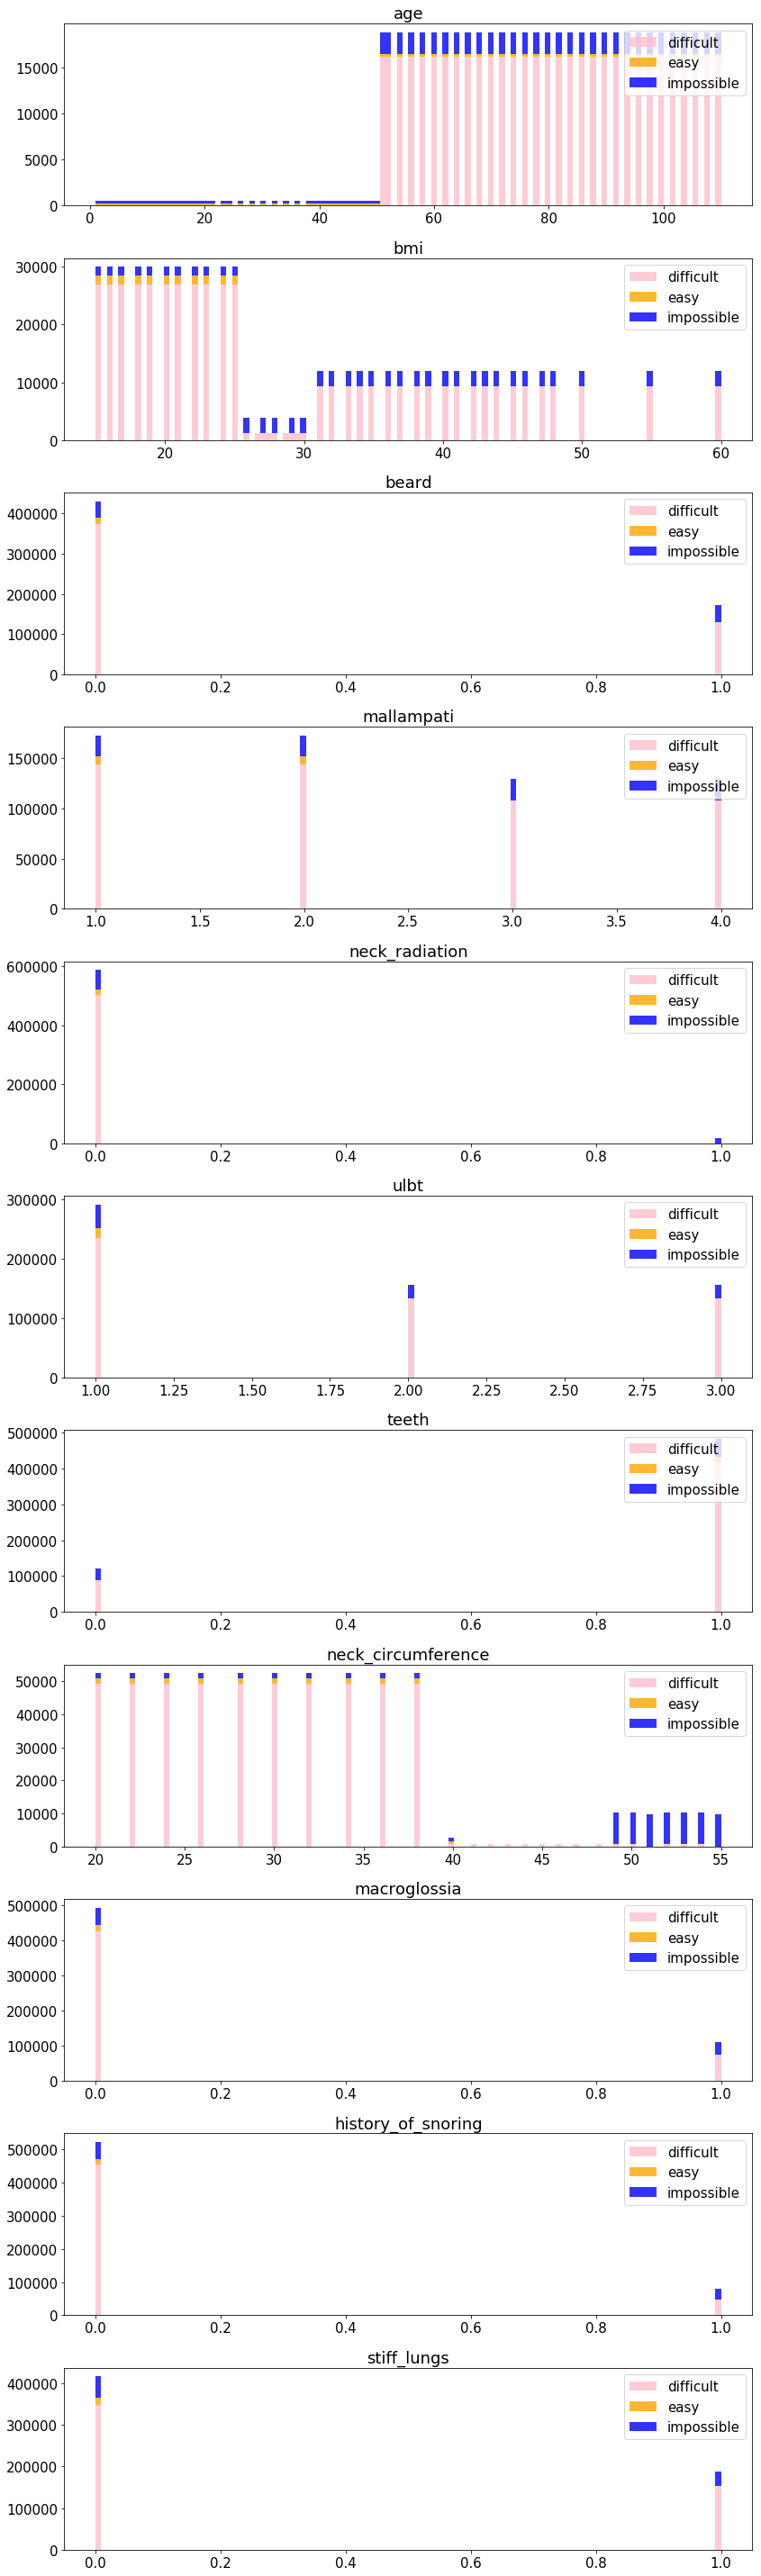

In [19]:
plt.rcParams.update({'font.size':15})
fig, axes= plt.subplots(nrows=11, ncols=1, figsize=(12,40))
axes=axes.ravel()
for idx,ax in  enumerate(axes):
    ax.figure
    #binwidth=(max(df[feature_mean[idx]]) - min(df[feature_mean[idx]]))/50 # stacked = true places one above other
    ax.hist([dfD[feature_mean[idx]],dfE[feature_mean[idx]],dfI[feature_mean[idx]]], alpha=0.8, stacked=True,label=['difficult','easy','impossible'],color=['pink','orange','b'],bins=110)
    ax.legend(loc= 'upper right')
    ax.set_title(feature_mean[idx])
    
plt.tight_layout()
plt.show()

In [18]:
traindf, testdf = train_test_split(df, test_size = 0.3)

In [26]:
def classification_model0(model, data, traindf, testdf, predictors, outcome):
  #Fit the model:
  model.fit(traindf[predictors],traindf[outcome])
  
  #Make predictions on test set:
  predictions = model.predict(testdf[predictors])

  #Make predictions on train set:
  predictions_train = model.predict(traindf[predictors])
    
  #accuracy for test 
  accuracy = metrics.accuracy_score(predictions,testdf[outcome])
    
  #accuracy for train
  accuracy1 = metrics.accuracy_score(predictions_train,traindf[outcome])
    
  #print test results
  x=[i for i in range(75,100)]
  y=predictions[75:100]
  y1=testdf['target'][75:100]
  plt.scatter(x, y, color='red',label='Obtained outcome')
  plt.scatter(x, y1, color='g', label='Expected Outcome')
  
  plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1))
  plt.xlabel('test values')
  plt.ylabel('Algorithm outcome')
  plt.yticks([0,1,2], ['EMV','DMV','IMV'])
  plt.show()
 
  print("test Accuracy : %s" % "{0:.3%}".format(accuracy))
  print("train Accuracy : %s" % "{0:.3%}".format(accuracy1))

  scores = cross_val_score(model, data[predictor_var],data[outcome], cv=5)
  print(scores)
  print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
  

In [19]:
def classification_model(model, data, traindf, testdf, predictors, outcome):
  scores = cross_val_score(model, data[predictor_var],data[outcome], cv=5)
  print(scores)
  print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
  

Algorithm: Logistic Regression


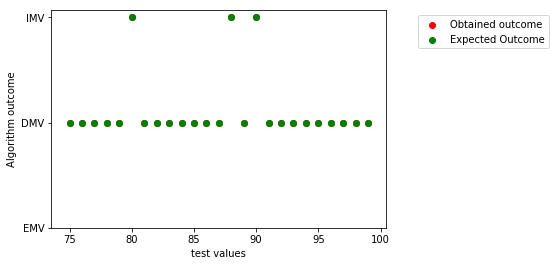

test Accuracy : 98.882%
train Accuracy : 98.848%
[0.9887275  0.98887647 0.98856197 0.98851212 0.98775885]
Accuracy: 0.988 (+/- 0.001)


In [28]:
predictor_var = ['age','bmi',
 'beard',
 'mallampati',
 'neck_radiation',
 'ulbt',
 'teeth','neck_circumference','macroglossia','history_of_snoring',
 'stiff_lungs']
outcome_var='target'
print("Algorithm: Logistic Regression")
model=LogisticRegression()
classification_model0(model,df,traindf,testdf,predictor_var,outcome_var)

In [21]:
predictor_var = ['age','bmi',
 'beard',
 'mallampati',
 'neck_radiation',
 'ulbt',
 'teeth','neck_circumference','macroglossia','history_of_snoring',
 'stiff_lungs']
outcome_var='target'
print("Algorithm: Random Forest")
model = RandomForestClassifier(n_estimators=100, min_samples_split=50)
classification_model(model,df,traindf,testdf,predictor_var,outcome_var)

Algorithm: Random Forest
[1. 1. 1. 1. 1.]
Accuracy: 1.000 (+/- 0.000)


In [22]:
#support vector machine
predictor_var = ['age','bmi',
 'beard',
 'mallampati',
 'neck_radiation',
 'ulbt',
 'teeth','neck_circumference','macroglossia','history_of_snoring',
 'stiff_lungs']
outcome_var='target'
print("Algorithm: Support vector Machine")

svc = svm.SVC(kernel='rbf', C=1)
classification_model(model,df,traindf,testdf,predictor_var,outcome_var)

Algorithm: Support vector Machine
[1. 1. 1. 1. 1.]
Accuracy: 1.000 (+/- 0.000)


In [23]:
#Naive bayes

predictor_var = ['age','bmi',
 'beard',
 'mallampati',
 'neck_radiation',
 'ulbt',
 'teeth','neck_circumference','macroglossia','history_of_snoring',
 'stiff_lungs']
outcome_var='target'
print("Algorithm: Naive Bayes classifier")
model = GaussianNB()
classification_model(model,df,traindf,testdf,predictor_var,outcome_var)

Algorithm: Naive Bayes classifier
[0.89107387 0.89002276 0.89069315 0.8916597  0.89083114]
Accuracy: 0.891 (+/- 0.001)


Algorithm: K nearest neighbour


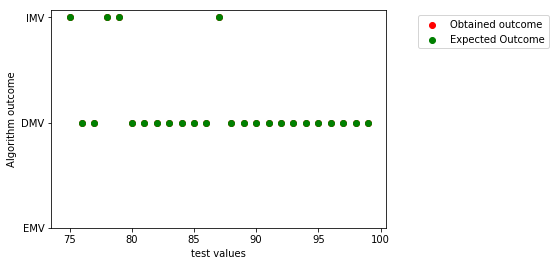

test Accuracy : 99.030%
train Accuracy : 99.638%
[0.90799917 0.97046969 0.97258845 0.96451835 0.82360828]
Accuracy: 0.928 (+/- 0.115)


In [32]:
#Knn

predictor_var = ['age','bmi',
 'beard',
 'mallampati',
 'neck_radiation',
 'ulbt',
 'teeth','neck_circumference','macroglossia','history_of_snoring',
 'stiff_lungs']
outcome_var='target'
print("Algorithm: K nearest neighbour")
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model,df,traindf,testdf,predictor_var,outcome_var)

In [25]:
#decision tree

predictor_var = ['age','bmi',
 'beard',
 'mallampati',
 'neck_radiation',
 'ulbt',
 'teeth','neck_circumference','macroglossia','history_of_snoring',
 'stiff_lungs']
outcome_var='target'
print("Algorithm: Decision tree classifier")
model = DecisionTreeClassifier()
classification_model(model,df,traindf,testdf,predictor_var,outcome_var)

Algorithm: Decision tree classifier
[1. 1. 1. 1. 1.]
Accuracy: 1.000 (+/- 0.000)
